# D209 - Data Mining I
___
## Performance Assessment - Task 1: Classification Analysis
### Medical Readmission Data Set (Clean)
---
<br></br>

## Part I - Research Question

### A1: Proposal of Question

The central research question addressed by this analysis is to determine:

>Can a patient's readmission (`ReAdmis`) status (`Yes/No`) be accurately classified given their recorded vitamin D level (`VitD_levels`) and number of days initially hospitalized (`Initial_days`)? 

In terms of hypothesis testing, our null hypothesis ($H_0$) is:

>The recorded vitamin D level (`VitD_levels`) and length of initial hospitalization (`Initial_days`) features from the medical readmission dataset have *no* statistically significant predictive power to classify a given patient's readmission status (`ReAdmis`).

Additionally, our alternate hypothesis ($H_1$) is:

>The recorded vitamin D levels (`VitD_levels`) and length of initial hospitalization (`Initial_days`) features from the medical readmission dataset *do* classify a given patient's readmission status (`ReAdmis`) in a statistically significant way.

### A2: Defined Goal

The primary goal of the following analysis is to discover whether or not the vitamin D level (`VitD_levels`) and initial length of hospitalization (`Initial_days`) features of the medical readmission dataset will be sufficient to accurately classify readmission status of a given patient (`ReAdmis`) using the K-Nearest Neighbors model. This will be assessed using the $\hbox{Python}$ programming language using libraries including `pandas`, `sklearn`, `plotly`, and others to achieve the goal of statistically significant classification of the target feature `ReAdmis`.

## Part II - Method Justification

### B1: Explanation of Classification Method

The selected classification method, $k$-Nearest Neighbors, is a relatively simple algorithm. It works by selecting a value, $k$, representing the number of similar features, evaluating the $k$ most similar features, then each of the $k$ "nearest neighbors" or most similar features represent a "vote" based on their respective classification. The category with the most "votes" is then determined to be the category of the feature in question. This analysis aims to identify an appropriate $k$-value and evaluate the classification of the target variable (`ReAdmis`). The expected outcome would be a binary of "Yes" or "No" depending on whether or not the patient was readmitted to the hospital. If the model proves to be useful in classifying readmission, we could expect to see a statistically significant accuracy in selecting the appropriate classification.

### B2: Summary of Method Assumptions

The $k\text{NN}$ model has very few assumptions, which enables it to be a potentially useful model for many disparate applications. However, one important assumption of the $k\text{NN}$ algorithm for our particular application is the assumption that the $k$-value is more useful and predictive if it is an odd number, so that the "voting" does not fall into an even split.  

### B3: Packages/Libraries List

In [1]:
# Load in libraries needed
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import plotly.express as px
import matplotlib.pyplot as plt

# Read medical dataset into dataframe as df
df = pd.read_csv('./data/medical_clean.csv')

The following $\hbox{Python}$ libraries and packages will be utilized in this analysis:
 - `pandas`
 - `KNeighborsClassifier` from `sklearn.neighbors`
 - `train_test_split` from `sklearn.model_selection`
 - `confusion_matrix`, `roc_curve`, and `auc` from `sklearn.metrics`
 - `plotly.express`
 - `matplotlib.pyplot`

**Pandas**

 - The `pandas` library will be heavily relied upon for the initial import, filtering and general preparation of the data prior to running our analysis. 

**KNeighborsClassifier**

 - The `KNeighborsClassifier` package from the `sklearn.neighbors` library will be used to select a value for $k$, fit/train, and test the $k\text{NN}$ algorithm on the dataset.  

**Train_test_split**

 - The `train_test_split` package from the `sklearn.model_selection` library will be used to facilitate the splitting of the sub-selected dataset. It provides a quick and easy way to select a random sample to reserve for testing the model once trained.

**Confusion_matrix**, **roc_curve**, and **auc**

 - The `confusion_matrix` package from the `sklearn.metrics` library will be used to evaluate the $k\text{NN}$ model on the test once trained. When input with predictions and actuals (test set), it provides a matrix showing the accuracy of the predictions in the form of true/false positive/negative.  
 - The `roc_curve` package from the `sklearn.metrics` library will be used to evaluate the accuracy of the $k\text{NN}$ model in conjunction with the `auc` package.  
 - The `auc` package from the `sklearn.metrics` library will also be used to evaluate the accuracy of the $k\text{NN}$ model in conjunction with the `roc_curve` package.

**Plotly Express**

 - The `Plotly Express` library will be used to graphically represent the composition of the data, the confusion matrix, the optimization of the model, and any other similar visual as needed.

**Matplotlib**

 - The `matplotlib` library will be used to graphically represent the ROC-AUC of the model.

## Part III - Data Preparation

### C1: Data Preprocessing

The process to complete to prepare the data for model selection is relatively minor, given that the raw dataset used in this project has already been cleaned in a prior project (see project D206 - Data Cleaning). Using the pre-cleaned dataset, we will first partition the data to include only those variables we intend to feed into our model. As described above, our model input will consist of the predictor numeric features `VitD_levels` (continuous) and `Initial_days` (continuous) as well as the binary target feature `ReAdmis`.

Next, we will need to ensure that the data type of each variable is appropriate for that kind of feature. For example, we will ensure that, because `ReAdmis` is a binary, categorical feature, is transformed with dummy encoding in $\hbox{Python}$.

### C2: Dataset Variables

As addressed above, the variables used in the following KNN classification analysis will include the predictor variables `VitD_levels`, `Initial_days`, and the target variable `ReAdmis`. 

The data types of the variables are as follows:

|Variable|Type|Subtype|
|:-:|:-:|:-:|
|`VitD_levels`|Numeric|Continuous|
|`Initials_days`|Numeric|Continuous|
|`ReAdmis`|Categorical|Binary|



### C3: Steps for Analysis

The following steps were taken to perform the analysis:

*The steps enumerated correspond to code segments in section D3*

 - **[Step 1 - Load in libraries and dataset](#step-1---load-in-libraries-and-dataset)**
   - This initial step involves importing the necessary libraries and modules as well as reading-in the initial dataset. Finally, the initial dataset is inspected using the `.info()` method to take a quick glance at all of the features and ensure no NaNs are present.
 - **[Step 2 - Subset data & initial EDA](#step-2---subset-data--initial-eda)**
   - This step takes the initial dataset and selects out the `Initial_days`, `VitD_levels`, and `ReAdmis` features. Those features are explored using descriptive statistics and some simple visualizations. 
 - **[Step 3 - Prepare subset data for analysis](#step-3---prepare-subset-data-for-analysis)**
   - The subset data is then prepared by ensuring the correct datatypes are used (setting ReAdmis feature to category type), then splitting the data for training and testing.
 - **[Step 4 - Set KNN, fit, and test](#step-4---set-knn-fit-and-test)**
   - The initial number of `n_neighbors` is set on $k\text{NN}$ as 7. Then the data is fit to the $k\text{NN}$ model and testing is performed on the `X_test` and `y_test` data to evaluate the model.
 - **[Step 5 - Solve for optimal `n_neighbors`](#step-5---solve-for-optimal-nneighbors)**
   - Lastly, in order to optimize the model, an algorithm is used to test using a `n_neighbors` value of 1-20. A plot is then generated to view the `knn.score` value on the y-axis and the `n_neighbors` value on the x-axis to identify the optimal value. 

### C4: Cleaned Dataset

```
# Write cleaned dataset to .csv
df1.to_csv('./data/d209_cleaned_dataset.csv')
```

Please see attached, cleaned dataset included in Task 1 submission.

## Part IV - Analysis

### D1: Splitting the Data

We will use the module `train_test_split` from the `sklearn` library to split the dataset. This tool makes the process of splitting quite simple. The split percentage will be 80/20 with 80% of the total observations utilized in training the model, while the remaining 20% will be reserved for testing the model. Additionally, as described in the code below, a random seed of 42 was chosen for the randomization. Seed 42 was chosen at random as well.

```
# Declare X as df1 Initial_days and VitD_levels
# without target feature ReAdmis
X = df1.drop(['ReAdmis'],
             axis=1)

# Declare y as df1 Readmis target feature 
y = df1.ReAdmis

# Split data using 80/20 split and seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Set kNN k=7 and fit to training data
knn = KNeighborsClassifier(7)
knn.fit(X_train,
        y_train)

# Test kNN on test data
knn.score(X_test,
          y_test)
```

### D2: Output & Intermediate Calculations

The present analysis consists primarily of the $k\text{NN}$ algorithm and determining the optimal value for `n_neighbors`. After first preparing the data for analysis, minor EDA steps, such as preparing descriptive statistics and visualizing the data through the use of boxplots on the selected features, are taken to gain a bit of perspective prior to modelling. After brief EDA, a preliminary attempt to fit the training data to the $k\text{NN}$ model is performed. The value of $k$ is arbitrarily selected as a first step prior to running further analysis on optimizing $k$. Finally, the optimization analysis is performed Below are examples of the above-mentioned intermediate steps:

In [2]:
# Sub-select for pre-determined features
df1 = df.loc[:, ['Initial_days',
                 'VitD_levels',
                 'ReAdmis']]

# Summary statistics of the two predictor features
df1.describe()

,Initial_days,VitD_levels
count,10000.000000,10000.000000
mean,34.455299,17.964262
std,26.309341,2.017231
min,1.001981,9.806483
25%,7.896215,16.626439
50%,35.836244,17.951122
75%,61.161020,19.347963
max,71.981490,26.394449


<AxesSubplot:>

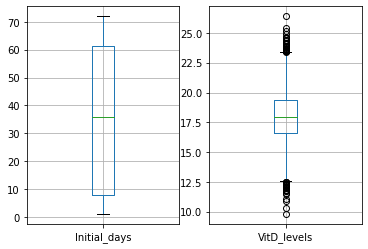

In [3]:
# Show boxplots of Initial_days and VitD_levels features
df1boxplts, axes = plt.subplots(nrows=1, ncols=2)
df1.boxplot('Initial_days', ax=axes[0])
df1.boxplot('VitD_levels', ax=axes[1])

In [4]:
# Show scatterplot of Initial_days and VitD_levels
# with ReAdmis as color to identify categories
fig = px.scatter(df.sample(n=200,
                           random_state=42),
                           x='Initial_days',
                           y='VitD_levels',
                           color='ReAdmis',
                           template='seaborn',
                           width=800,
                           height=500)
fig.show()

In [5]:
# Set ReAdmis to category type for easier
# handling with model and later visualization
df1.ReAdmis = df1.ReAdmis.astype('category')

# Declare X as df1 Initial_days and VitD_levels
# without target feature ReAdmis
X = df1.drop(['ReAdmis'],
             axis=1)

# Declare y as df1 Readmis target feature 
y = df1.ReAdmis

# Split data using 80/20 split and seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Set kNN k=7 and fit to training data
knn = KNeighborsClassifier(7)
knn.fit(X_train,
        y_train)

# Test kNN on test data
knn.score(X_test,
          y_test)

# Set kNN k=7 and fit to training data
knn = KNeighborsClassifier(7)
knn.fit(X_train,
        y_train)

# Test kNN on test data
knn.score(X_test,
          y_test)

# Loop through attempts to fit kNN using k
# value of 1 through 20 to identify optimal k
num_k = []
knnscore = []
for i in range(1,21):
    num_k.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knnscore.append(knn.score(X_test,
                              y_test))

# Create df of each k value and corresponding score
pltscore = pd.DataFrame({'num_k': num_k,
                         'knnscore': knnscore})

# Plot score by k value
fig = px.line(pltscore,
              x='num_k',
              y='knnscore',
              width=700,
              height=500)
fig.show()

### D3: Code Execution

#### Step 1 - Load in libraries and dataset

In [6]:
# Load in libraries needed
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import plotly.express as px
import matplotlib.pyplot as plt

# Read medical dataset into dataframe as df
df = pd.read_csv('./data/medical_clean.csv')

# Show summary of dataframe including dtypes and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

#### Step 2 - Subset data & initial EDA

In [7]:
# Sub-select for pre-determined features
df1 = df.loc[:, ['Initial_days',
                 'VitD_levels',
                 'ReAdmis']]

# Summary statistics of the two predictor features
df1.describe()

,Initial_days,VitD_levels
count,10000.000000,10000.000000
mean,34.455299,17.964262
std,26.309341,2.017231
min,1.001981,9.806483
25%,7.896215,16.626439
50%,35.836244,17.951122
75%,61.161020,19.347963
max,71.981490,26.394449


<AxesSubplot:>

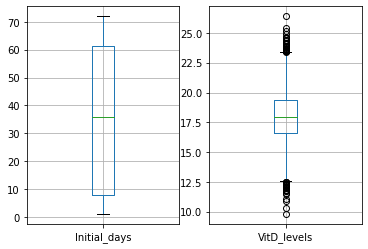

In [8]:
# Show boxplots of Initial_days and VitD_levels features
df1boxplts, axes = plt.subplots(nrows=1, ncols=2)
df1.boxplot('Initial_days', ax=axes[0])
df1.boxplot('VitD_levels', ax=axes[1])

In [9]:
# Show scatterplot of Initial_days and VitD_levels
# with ReAdmis as color to identify categories
fig = px.scatter(df.sample(n=200,
                           random_state=42),
                           x='Initial_days',
                           y='VitD_levels',
                           color='ReAdmis',
                           template='seaborn',
                           width=800,
                           height=500)
fig.show()

#### Step 3 - Prepare subset data for analysis

In [10]:
# Set ReAdmis to category type for easier
# handling with model and later visualization
df1.ReAdmis = df1.ReAdmis.astype('category')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Initial_days  10000 non-null  float64 
 1   VitD_levels   10000 non-null  float64 
 2   ReAdmis       10000 non-null  category
dtypes: category(1), float64(2)
memory usage: 166.3 KB


In [11]:
# Declare X as df1 Initial_days and VitD_levels
# without target feature ReAdmis
X = df1.drop(['ReAdmis'],
             axis=1)

# Declare y as df1 Readmis target feature 
y = df1.ReAdmis

# Split data using 80/20 split and seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


#### Step 4 - Set kNN, fit, and test

In [12]:
# Set kNN k=7 and fit to training data
knn = KNeighborsClassifier(7)
knn.fit(X_train,
        y_train)

# Test kNN on test data
knn.score(X_test,
          y_test)

0.982

In [13]:
# Set kNN k=7 and fit to training data
knn = KNeighborsClassifier(7)
knn.fit(X_train,
        y_train)

# Test kNN on test data
knn.score(X_test,
          y_test)

0.982

#### Step 5 - Solve for optimal `n_neighbors`

In [14]:
# Loop through attempts to fit kNN using k
# value of 1 through 20 to identify optimal k
num_k = []
knnscore = []
for i in range(1,21):
    num_k.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knnscore.append(knn.score(X_test,
                              y_test))

# Create df of each k value and corresponding score
pltscore = pd.DataFrame({'num_k': num_k,
                         'knnscore': knnscore})

# Plot score by k value
fig = px.line(pltscore,
              x='num_k',
              y='knnscore',
              width=700,
              height=500)
fig.show()

As demonstrated above, it seems that a $k$ of 13 is a decent value to stick with based on the scoring method we've implemented. We will perform additional analysis on accuracy below.

## Part V - Data Summary & Implications

### E1: Accuracy & AUC

The model has performed well, considering the scoring method utilized above. Below we will use an alternative scoring method, ROC-AUC, to understand the accuracy of the model. Calculating ROC, or Receiver Operator Characteristic, curve allows us to visualize the AUC, or Area Under the Curve. The ROC curve demonstrates the rate of true positive results on the Y-axis with the rate of false positives along the X-axis, thereby allowing us to understand the relationship between the model's specificity and sensitivity. AUC is a numerical value between 0 and 1 denoting the percent of area the ROC curve covers. In the case of our model, as demonstrated below, the AUC score is 0.9973, which is exceptional performance with a high level of true positives and true negatives.

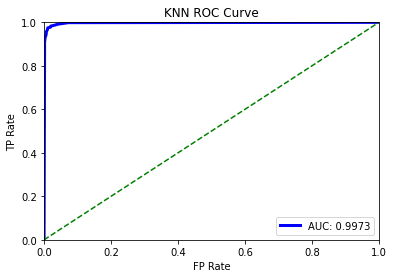

In [15]:
# Declare X as df1 Initial_days and VitD_levels
# without target feature ReAdmis
X = df1.drop(['ReAdmis'],
             axis=1)

# Declare y as df1 Readmis target feature using 0/1
y = df1.ReAdmis.cat.codes

# Split data using 80/20 split and seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Set neighbors value of 13 and fit
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(X_train,y_train)

# Calculate ROC Curve and AUC
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve with AUC value
plt.title('KNN ROC Curve')
plt.plot(fpr,
         tpr,
         'b',
         label= 'AUC: %0.4f' % roc_auc,
         lw=3)
plt.plot([0, 1], [0, 1],'g--')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

As a final step in our process of ensuring an optimal $k$ value, we will run the same optimization to visualize the range of 1-20 $k$ values with their corresponding AUC score and see whether our chosen $k$ of 13 remains an appropriate choice.

In [16]:
# Generate AUC scores for KNN on dataset
# based on n_neighbors range 1-20
num_k = []
auc_score = []
for i in range(1,21):
    num_k.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_scores = knn.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    auc_score.append(roc_auc)

# Create dataframe from AUC scores
pltscore = pd.DataFrame({'num_k': num_k,
                         'auc_score': auc_score})

# Plot KNN AUC frontier
fig = px.line(pltscore,
              x='num_k',
              y='auc_score',
              width=700,
              height=500)
fig.show()


As expected, we start to see dramatically diminishing returns after a $k$ of 10, but no significant drop in accuracy. This reaffirms our choice of $k$ = 13.

### E2: Results & Implications

As mentioned above, our model performed incredibly well in classifying readmission based on the features `Initial_days` and `VitD_levels`. As a result, our analysis supports the rejection of the null hypothesis ($H_0$) which states:

>The recorded vitamin D level (`VitD_levels`) and length of initial hospitalization (`Initial_days`) features from the medical readmission dataset have *no* statistically significant predictive power to classify a given patient's readmission status (`ReAdmis`).

Furthermore, our analysis supports the acceptance of the alternate hypothesis ($H_1$) which states:

>The recorded vitamin D levels (`VitD_levels`) and length of initial hospitalization (`Initial_days`) features from the medical readmission dataset *do* classify a given patient's readmission status (`ReAdmis`) in a statistically significant way.

Therefore, our initial research question (Can a patient's readmission (`ReAdmis`) status (`Yes/No`) be accurately classified given their recorded vitamin D level (`VitD_levels`) and number of days initially hospitalized (`Initial_days`)?) is answered in the affirmative based on the results of our above analysis.

It seems evident that the selected features provide for the ability to classify with a high level of accuracy the readmission status of a given patient. With regard to implications, though the analysis does not explicitly provide the insight into whether or not these features are also predictive of readmission status, it is reasonable to preliminarily assume that as a patient's initial stay lengthens and their vitamin D level is relatively low, the probability that patient will be readmitted increases. This would imply that, if the goal is to reduce readmissions a much as possible, a sensible course of action could include measures to shorten initial length of stay as much as possible and support vitamin D levels if low.

### E3: Limitations

One limitation of the analysis is the nature of the distribution of several features, including initial length of hospitalization (`Initial_days`). As the distribution of this feature is not normal and is heavily binomial, the reliability of the analysis becomes more difficult to ascertain. In terms of assumptions, normal distribution is not indicated for $k\text{NN}$ and therefore the classification modelling should not suffer from a non-normal distribution. However, another limitation of the `Initial_days` feature is that it is somewhat obvious that the longer a patient is initially hospitalized, the more likely they are to be readmitted. Though, often presumptions are proven incorrect upon further analysis, therefore this analysis is at least confirmatory.

### E4: Course of Action

As a result of the analysis performed, it is recommended that the organization take actions to limit a patient's initial length of stay and support a patient's vitamin D level if low. Leadership should consult with physicians on safe and effective ways to shorten hospitalizations and address low vitamin D levels. It is possible this would lead to lower rates of readmission. Additionally, further analysis and inquiry is recommended to better understand and enhance the data gathering process. In particular, investigating the integrity and reliability of the `Initial_days` feature is recommended. Ensuring that the underlying data is as reliable as possible will lead to better and more useful analysis in the future. 